In [1]:
def import_data(url):
    df = pd.read_csv(url)
    df.drop(columns=['Id'],inplace=True)
    df.dropna(axis=1,inplace=True)
    
    for col in df:
        if col[0].isdigit():
            nums = ['zero','one','two','three','four','five','six','seven','eight','nine']
            df.rename(columns={col:nums[int(col[0])]+'_'+col},inplace=True)
    return df

import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max.columns',100)
data = import_data("housing_full.csv")

In [2]:
data.shape

(1460, 61)

In [3]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,one_1stFlrSF,two_2ndFlrSF,LowQualFinSF,TotalSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Univariate Analysis

In [19]:
#To import customized functions
#import sys
#sys.path.append('C:\\Users\\Priya\\Data Scientist\\Data Science Projects uisng python\\Project5 - EDA\\')
#import Func_housing.ipynb as fun

#Test the function
#import pandas as pd
#pd.set_option('display.max_rows',100)
#pd.set_option('display.max.columns',100)
#fun.unistats(data) 

#import os
#current_path = os.getcwd()

In [5]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','Skew','Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),
                                  df[col].quantile(0.75),df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],'-','-','-','-','-','-','-','-','-']
    return output_df.sort_values(by=['Numeric','Skew','Unique'],ascending=False)

#Test the function
import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max.columns',100)
unistats(data)

#The mode of a set of data values is the value that appears most often. 
#It is the value at which the data is most likely to be sampled

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
MiscVal,1460,0,21,int64,True,0,43.489041,0,0.0,0.0,0.0,15500,496.123024,24.476794,701.003342
PoolArea,1460,0,8,int64,True,0,2.758904,0,0.0,0.0,0.0,738,40.177307,14.828374,223.268499
LotArea,1460,0,1073,int64,True,7200,10516.828082,1300,7553.5,9478.5,11601.5,215245,9981.264932,12.207688,203.243271
three_3SsnPorch,1460,0,20,int64,True,0,3.409589,0,0.0,0.0,0.0,508,29.317331,10.304342,123.662379
LowQualFinSF,1460,0,24,int64,True,0,5.844521,0,0.0,0.0,0.0,572,48.623081,9.011341,83.234817
KitchenAbvGr,1460,0,4,int64,True,1,1.046575,0,1.0,1.0,1.0,3,0.220338,4.488397,21.532404
BsmtFinSF2,1460,0,144,int64,True,0,46.549315,0,0.0,0.0,0.0,1474,161.319273,4.255261,20.113338
ScreenPorch,1460,0,76,int64,True,0,15.060959,0,0.0,0.0,0.0,480,55.757415,4.122214,18.439068
BsmtHalfBath,1460,0,3,int64,True,0,0.057534,0,0.0,0.0,0.0,2,0.238753,4.103403,16.396642
EnclosedPorch,1460,0,120,int64,True,0,21.95411,0,0.0,0.0,0.0,552,61.119149,3.089872,10.430766


In [6]:
#The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.

# Bivariate Analysis

In [7]:
#Which feature have strongest correlation on salesprice

- Bivariate: Numeric to numeric: Correlation
- Bivariate: Numeric to categorical: one-way ANOVA (3+ groups) or t-test (2 groups)
- Bivariate: categorical to categorical: Chi-square

**Correlation**

In [8]:
from scipy import stats
r,p = stats.pearsonr(data.SalePrice,data.LotArea)
print("Correaltion coefficinet : ",r)
print("P-value : ",p)

Correaltion coefficinet :  0.2638433538714057
P-value :  1.1231391549193063e-24


In [9]:
from scipy import stats
corr = stats.pearsonr(data.SalePrice,data.FullBath)
print("Correaltion coefficinet : " + str(round(corr[0],4)))
print("P-value : " + str(round(corr[0],4)))

Correaltion coefficinet : 0.5607
P-value : 0.5607


In [10]:
def anova(df,feature,label):
    import pandas as pd
    from scipy import stats
    import numpy as np
    
    groups = df[feature].unique() #step1:Use the unique() function to generate a list of unique values in this categorical column
    #print(groups)
    df_grouped = df.groupby(feature) #step2:Use the groupby() function to sort the dataframe by the current categorical column
    #print(df_grouped)
    group_labels = [] #step3:Create an empty list that will be a two dimensional list of lists to store the label values associated with each category
    for g in groups: #step4:Loop through the unique category values
        g_list = df_grouped.get_group(g) #Step5: Use get_group function to return list containing only the records for each unique value
        #print(g_list)
        group_labels.append(g_list[label])#step6: Use the append() function to store the list of label values created in the prior step into our lists-of-lists
        #print(group_labels)
    
    return stats.f_oneway(*group_labels) #The * sign is a way of dynamically adding every group in a list of lists


In [11]:
def bivstats(df,label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    output_df = pd.DataFrame(columns=['r','F','X2','p-value']) # r and p-value for correlation, F for Anova, X2 for Chi square
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0: #to remove ValueError: array must not contain infs or NaNs
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label],df[col])
                    output_df.loc[col] = [round(r,3),np.nan,np.nan,round(p,5)]
                else:
                    F,p = anova(df[[col,label]],col,label)
                    output_df.loc[col] = [np.nan,round(F,3),np.nan,round(p,5)]
            else:
                output_df.loc[col] = [np.nan,np.nan,np.nan,np.nan]
            
    #output_df.sort_values(by=['r'],ascending=False,inplace=True) #TypeError: '<' not supported between instances of 'str' and 'float' # round(r,3) is int,'-' is string. So convert '-' to np.nan
    print(output_df.dtypes)
    #to sort abs() values
    return output_df.reindex(output_df.r.abs().sort_values(ascending=False).index)

import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
data = import_data("housing_full.csv")
bivstats(data,'SalePrice')

r          float64
F          float64
X2         float64
p-value    float64
dtype: object


,r,F,X2,p-value
OverallQual,0.79100,NaN,NaN,0.00000
TotalSF,0.70900,NaN,NaN,0.00000
GarageCars,0.64000,NaN,NaN,0.00000
GarageArea,0.62300,NaN,NaN,0.00000
TotalBsmtSF,0.61400,NaN,NaN,0.00000
one_1stFlrSF,0.60600,NaN,NaN,0.00000
FullBath,0.56100,NaN,NaN,0.00000
TotRmsAbvGrd,0.53400,NaN,NaN,0.00000
YearBuilt,0.52300,NaN,NaN,0.00000
YearRemodAdd,0.50700,NaN,NaN,0.00000


In [12]:
def bivstats(df,label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    output_df = pd.DataFrame(columns=['stat','+/-','Effect size','p-value']) # r and p-value for correlation, F for Anova, X2 for Chi square
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0: #to remove ValueError: array must not contain infs or NaNs
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label],df[col])
                    output_df.loc[col] = ['r',np.sign(r),abs(round(r,3)),round(p,5)]
                else:
                    F,p = anova(df[[col,label]],col,label)
                    output_df.loc[col] = ['F','',round(F,3),round(p,5)]
            else:
                output_df.loc[col] = [np.nan,np.nan,np.nan,np.nan]
            
    #output_df.sort_values(by=['r'],ascending=False,inplace=True) #TypeError: '<' not supported between instances of 'str' and 'float' # round(r,3) is int,'-' is string. So convert '-' to np.nan
    print(output_df.dtypes)
    
    #return output_df
    return output_df.sort_values(by=['stat','Effect size'],ascending=[False,False])

import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
data = import_data("housing_full.csv")
bivstats(data,'SalePrice')

stat            object
+/-             object
Effect size    float64
p-value        float64
dtype: object


,stat,+/-,Effect size,p-value
OverallQual,r,1.00000,0.79100,0.00000
TotalSF,r,1.00000,0.70900,0.00000
GarageCars,r,1.00000,0.64000,0.00000
GarageArea,r,1.00000,0.62300,0.00000
TotalBsmtSF,r,1.00000,0.61400,0.00000
one_1stFlrSF,r,1.00000,0.60600,0.00000
FullBath,r,1.00000,0.56100,0.00000
TotRmsAbvGrd,r,1.00000,0.53400,0.00000
YearBuilt,r,1.00000,0.52300,0.00000
YearRemodAdd,r,1.00000,0.50700,0.00000


# **Bivaraite Visualization**

In [13]:
def heteroscedasticity(df,feature,label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    #Fit the OLS model: ols(formula='[label]~[feature]',data=df).fit())
    model = ols(formula=(label + '~' + feature),data=df).fit()
    output_df = pd.DataFrame(columns=['LM stat','LM p-value','F stat','F p-value'])
   
    try:
        white_test = het_white(model.resid, model.model.exog)
        output_df.loc['White'] = white_test
    except:
        print("Unable to run white test of heteroscedasticity")
    
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    output_df.loc['Br-Pa'] = bp_test
    
    return output_df.round(3)

In [14]:
def scatter(feature,label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    
    #Calculate the regression line
    m,b,r,p,err = stats.linregress(data.OverallQual,data.SalePrice)
    
    textstr = 'y = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
    textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
    textstr += 'p = ' + str(round(p, 2)) + '\n'
    textstr += str(feature.name) + ' skew = ' + str(round(feature.skew(), 2)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(), 2)) + '\n'
    textstr += str(heteroscedasticity(pd.DataFrame(label).join(pd.DataFrame(feature)),feature.name,label.name))
    #print(feature.name)
    
    sns.set(color_codes=True)
    ax = sns.jointplot(x=feature,y=label,kind='reg')
    ax.fig.text(1,0.114,textstr,fontsize=12,transform=plt.gcf().transFigure)
    plt.show()

    
#scatter(data.OverallQual,data.SalePrice)



In [15]:
stats.linregress(data.OverallQual,data.SalePrice)

LinregressResult(slope=45435.802593099404, intercept=-96206.07951476044, rvalue=0.7909816005838052, pvalue=2.185675268e-313, stderr=920.4302464882171, intercept_stderr=5756.407385731068)

**Bar Chart**

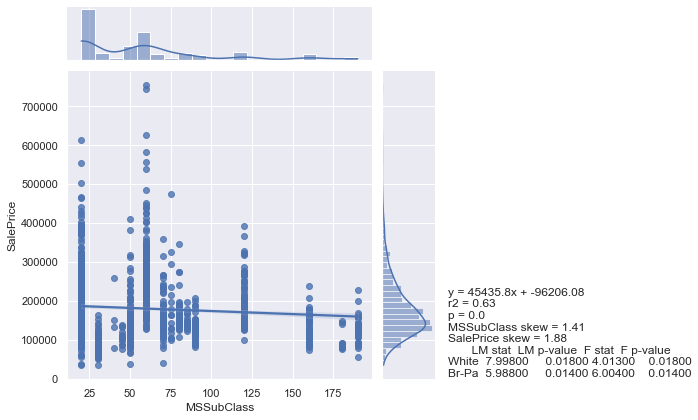

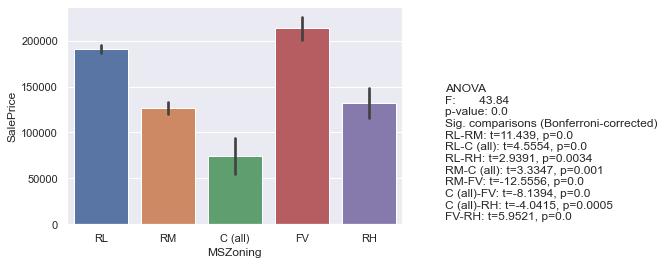

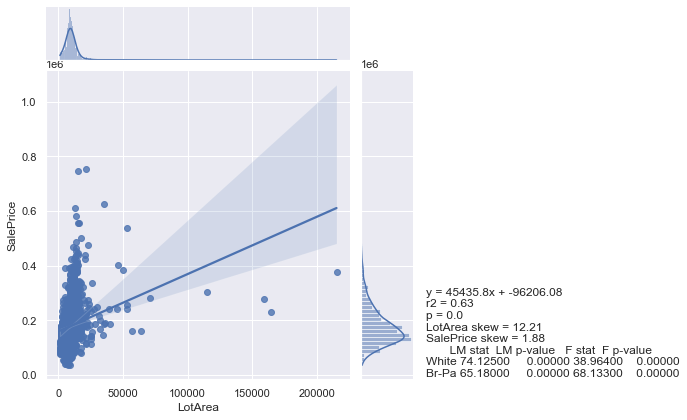

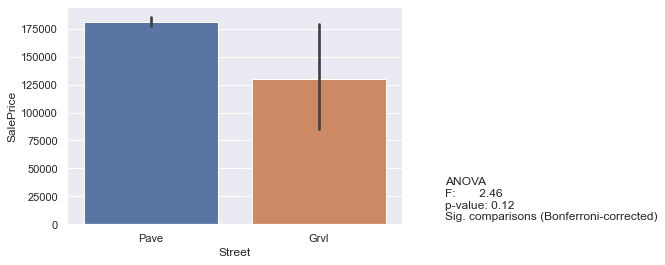

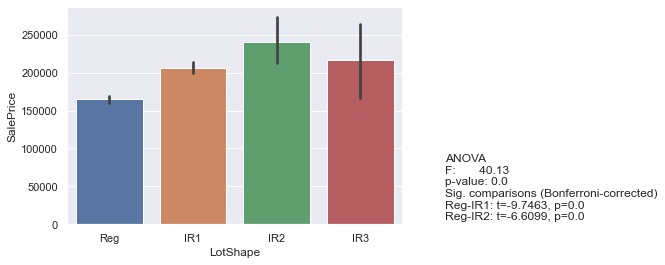

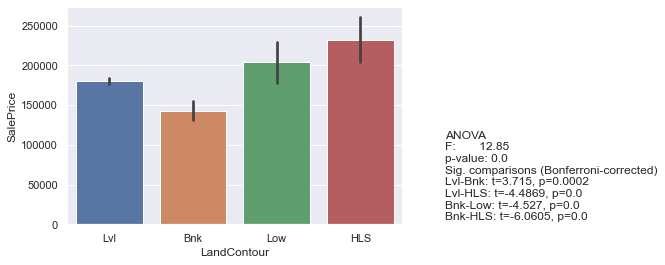

'AllPub' n =1459; 'NoSeWa' n = 1; no t-test performed


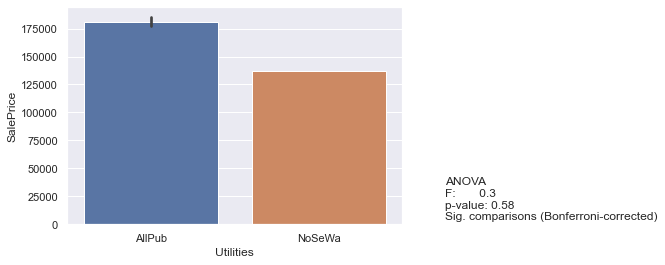

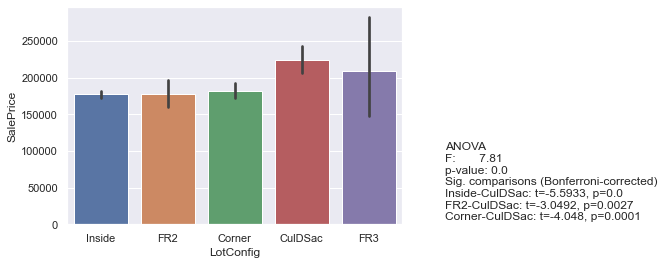

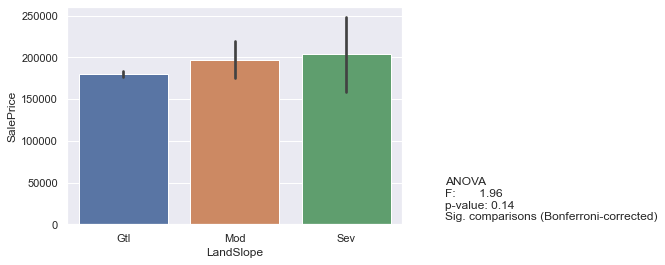

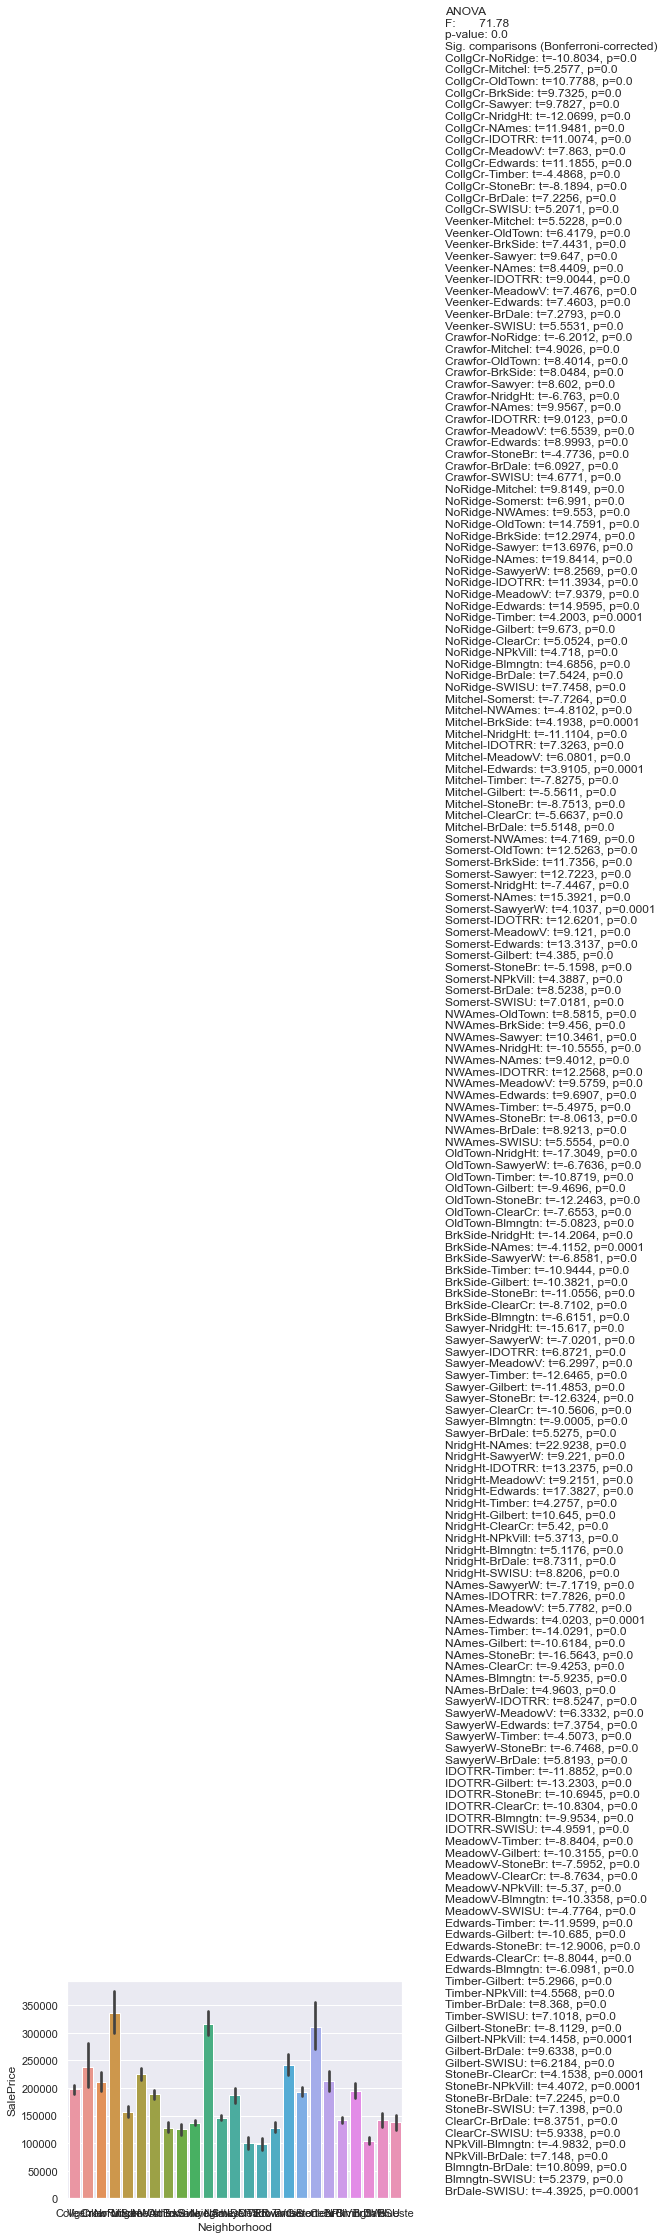

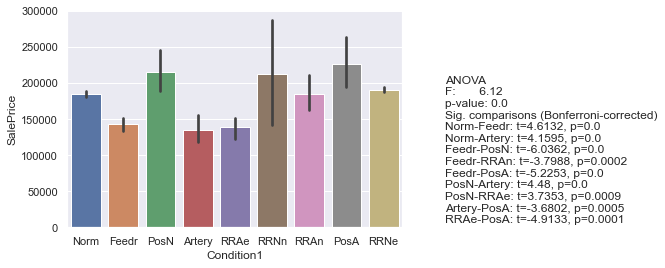

'Norm' n =1445; 'PosA' n = 1; no t-test performed
'Norm' n =1445; 'RRAn' n = 1; no t-test performed
'Norm' n =1445; 'RRAe' n = 1; no t-test performed
'Artery' n =2; 'PosA' n = 1; no t-test performed
'Artery' n =2; 'RRAn' n = 1; no t-test performed
'Artery' n =2; 'RRAe' n = 1; no t-test performed
'RRNn' n =2; 'PosA' n = 1; no t-test performed
'RRNn' n =2; 'RRAn' n = 1; no t-test performed
'RRNn' n =2; 'RRAe' n = 1; no t-test performed
'Feedr' n =6; 'PosA' n = 1; no t-test performed
'Feedr' n =6; 'RRAn' n = 1; no t-test performed
'Feedr' n =6; 'RRAe' n = 1; no t-test performed
'PosN' n =2; 'PosA' n = 1; no t-test performed
'PosN' n =2; 'RRAn' n = 1; no t-test performed
'PosN' n =2; 'RRAe' n = 1; no t-test performed
'PosA' n =1; 'RRAn' n = 1; no t-test performed
'PosA' n =1; 'RRAe' n = 1; no t-test performed
'RRAn' n =1; 'RRAe' n = 1; no t-test performed


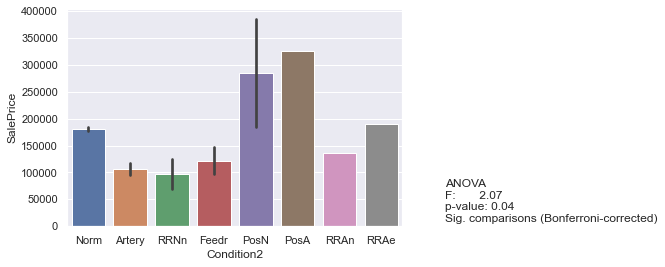

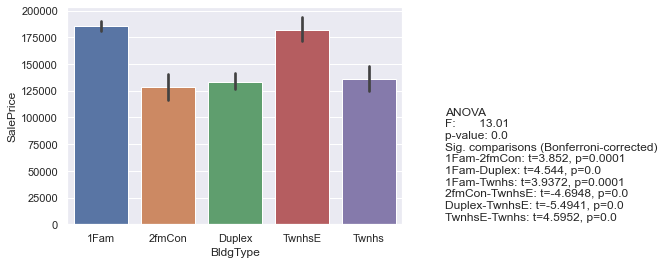

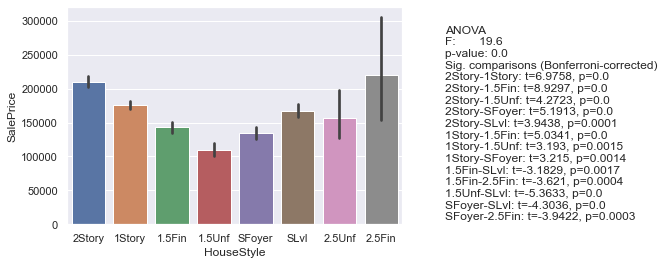

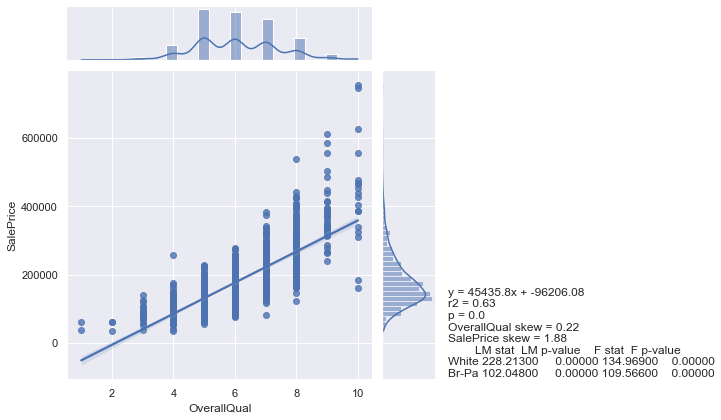

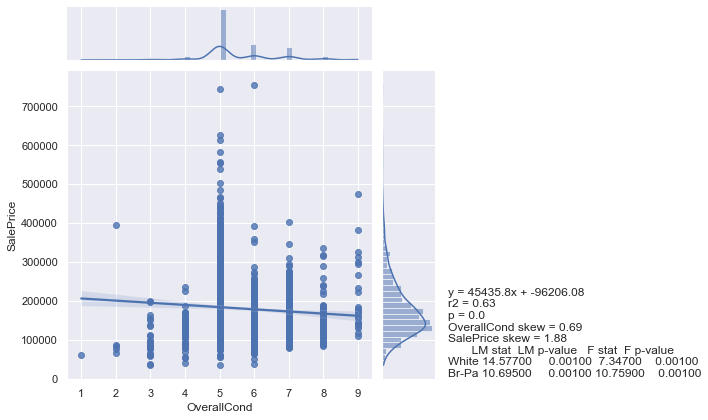

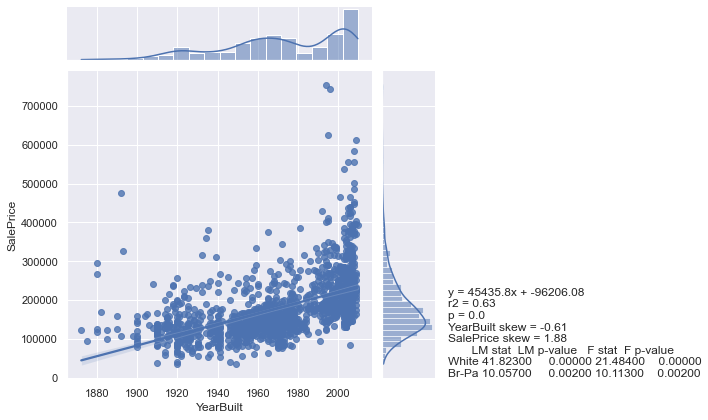

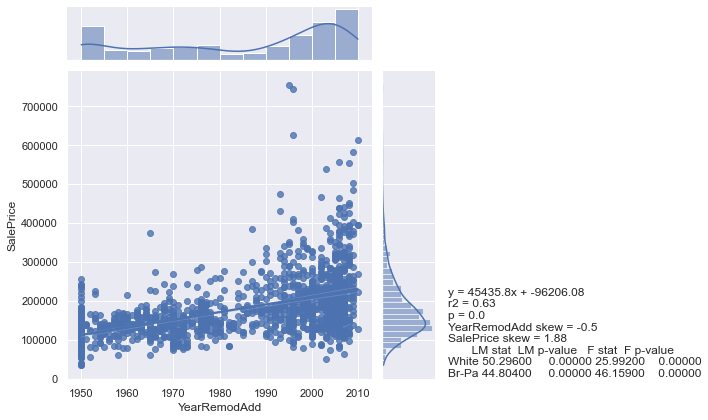

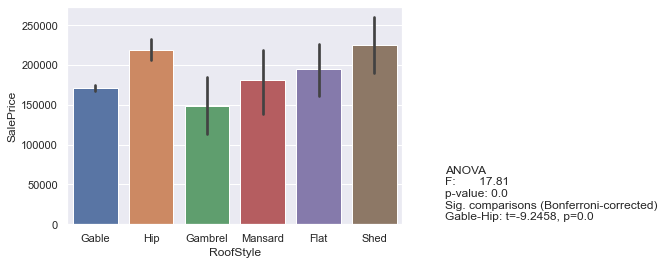

'CompShg' n =1434; 'Metal' n = 1; no t-test performed
'CompShg' n =1434; 'Membran' n = 1; no t-test performed
'CompShg' n =1434; 'Roll' n = 1; no t-test performed
'CompShg' n =1434; 'ClyTile' n = 1; no t-test performed
'WdShngl' n =6; 'Metal' n = 1; no t-test performed
'WdShngl' n =6; 'Membran' n = 1; no t-test performed
'WdShngl' n =6; 'Roll' n = 1; no t-test performed
'WdShngl' n =6; 'ClyTile' n = 1; no t-test performed
'Metal' n =1; 'WdShake' n = 5; no t-test performed
'Metal' n =1; 'Membran' n = 1; no t-test performed
'Metal' n =1; 'Tar&Grv' n = 11; no t-test performed
'Metal' n =1; 'Roll' n = 1; no t-test performed
'Metal' n =1; 'ClyTile' n = 1; no t-test performed
'WdShake' n =5; 'Membran' n = 1; no t-test performed
'WdShake' n =5; 'Roll' n = 1; no t-test performed
'WdShake' n =5; 'ClyTile' n = 1; no t-test performed
'Membran' n =1; 'Tar&Grv' n = 11; no t-test performed
'Membran' n =1; 'Roll' n = 1; no t-test performed
'Membran' n =1; 'ClyTile' n = 1; no t-test performed
'Tar&Grv

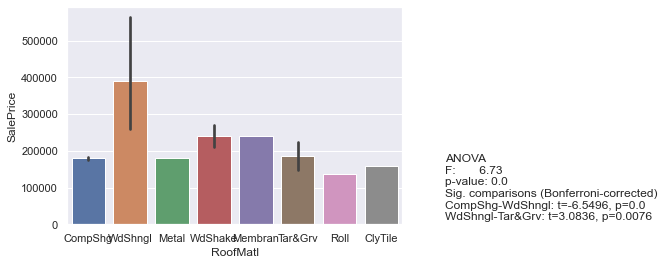

'VinylSd' n =515; 'AsphShn' n = 1; no t-test performed
'VinylSd' n =515; 'ImStucc' n = 1; no t-test performed
'VinylSd' n =515; 'CBlock' n = 1; no t-test performed
'MetalSd' n =220; 'AsphShn' n = 1; no t-test performed
'MetalSd' n =220; 'ImStucc' n = 1; no t-test performed
'MetalSd' n =220; 'CBlock' n = 1; no t-test performed
'Wd Sdng' n =206; 'AsphShn' n = 1; no t-test performed
'Wd Sdng' n =206; 'ImStucc' n = 1; no t-test performed
'Wd Sdng' n =206; 'CBlock' n = 1; no t-test performed
'HdBoard' n =222; 'AsphShn' n = 1; no t-test performed
'HdBoard' n =222; 'ImStucc' n = 1; no t-test performed
'HdBoard' n =222; 'CBlock' n = 1; no t-test performed
'BrkFace' n =50; 'AsphShn' n = 1; no t-test performed
'BrkFace' n =50; 'ImStucc' n = 1; no t-test performed
'BrkFace' n =50; 'CBlock' n = 1; no t-test performed
'WdShing' n =26; 'AsphShn' n = 1; no t-test performed
'WdShing' n =26; 'ImStucc' n = 1; no t-test performed
'WdShing' n =26; 'CBlock' n = 1; no t-test performed
'CemntBd' n =61; 'Asph

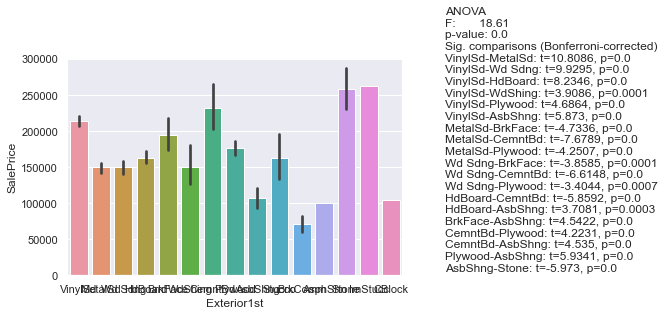

'VinylSd' n =504; 'Other' n = 1; no t-test performed
'VinylSd' n =504; 'CBlock' n = 1; no t-test performed
'MetalSd' n =214; 'Other' n = 1; no t-test performed
'MetalSd' n =214; 'CBlock' n = 1; no t-test performed
'Wd Shng' n =38; 'Other' n = 1; no t-test performed
'Wd Shng' n =38; 'CBlock' n = 1; no t-test performed
'HdBoard' n =207; 'Other' n = 1; no t-test performed
'HdBoard' n =207; 'CBlock' n = 1; no t-test performed
'Plywood' n =142; 'Other' n = 1; no t-test performed
'Plywood' n =142; 'CBlock' n = 1; no t-test performed
'Wd Sdng' n =197; 'Other' n = 1; no t-test performed
'Wd Sdng' n =197; 'CBlock' n = 1; no t-test performed
'CmentBd' n =60; 'Other' n = 1; no t-test performed
'CmentBd' n =60; 'CBlock' n = 1; no t-test performed
'BrkFace' n =25; 'Other' n = 1; no t-test performed
'BrkFace' n =25; 'CBlock' n = 1; no t-test performed
'Stucco' n =26; 'Other' n = 1; no t-test performed
'Stucco' n =26; 'CBlock' n = 1; no t-test performed
'AsbShng' n =20; 'Other' n = 1; no t-test perfo

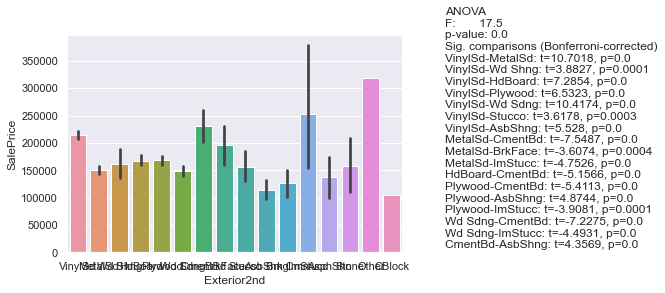

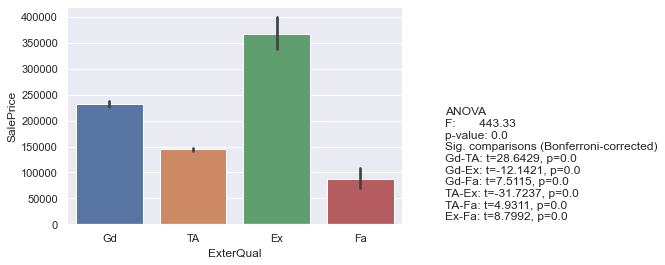

'TA' n =1282; 'Po' n = 1; no t-test performed
'Gd' n =146; 'Po' n = 1; no t-test performed
'Fa' n =28; 'Po' n = 1; no t-test performed
'Po' n =1; 'Ex' n = 3; no t-test performed


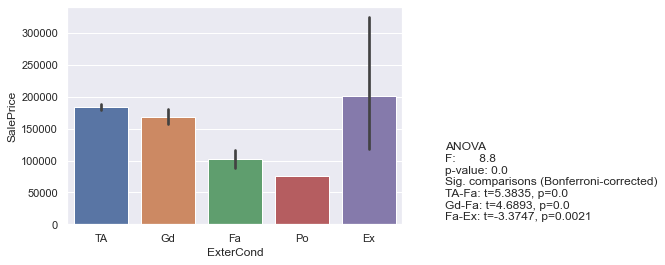

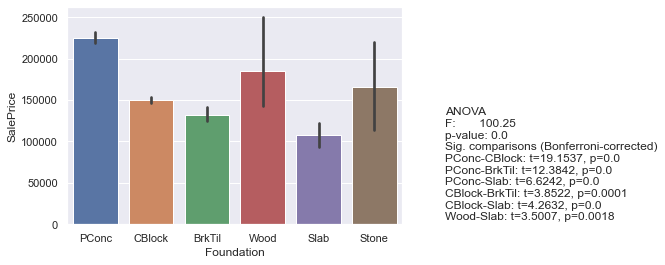

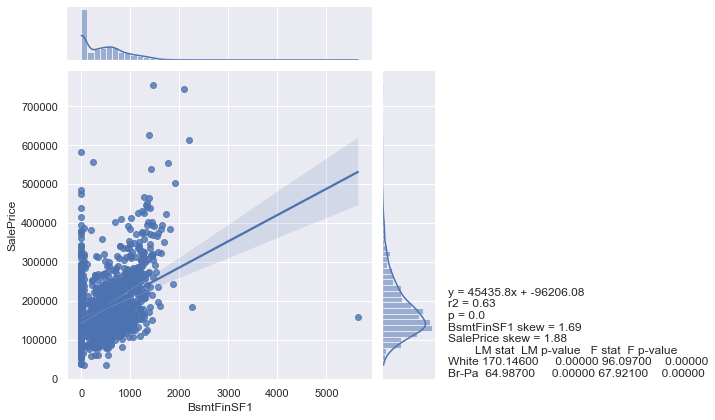

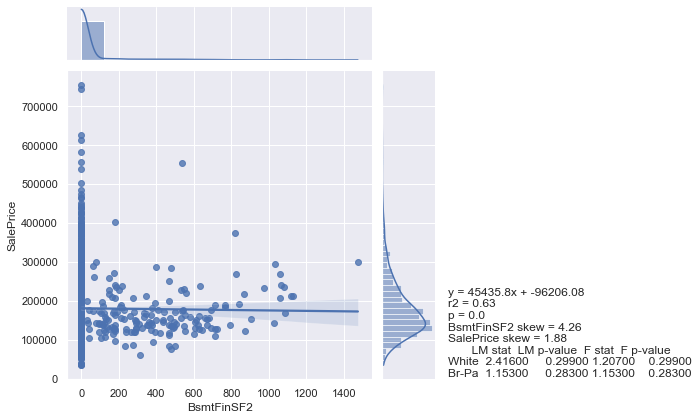

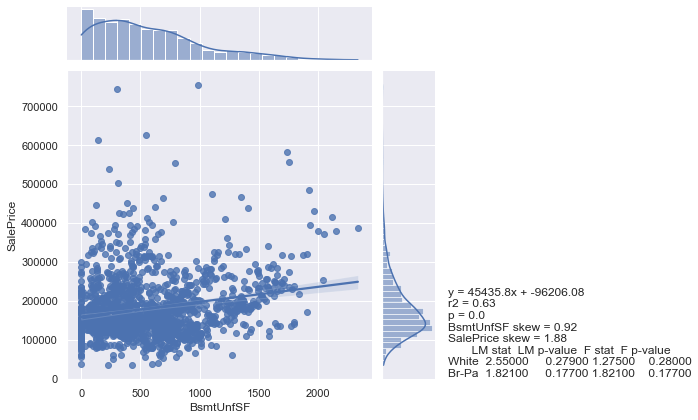

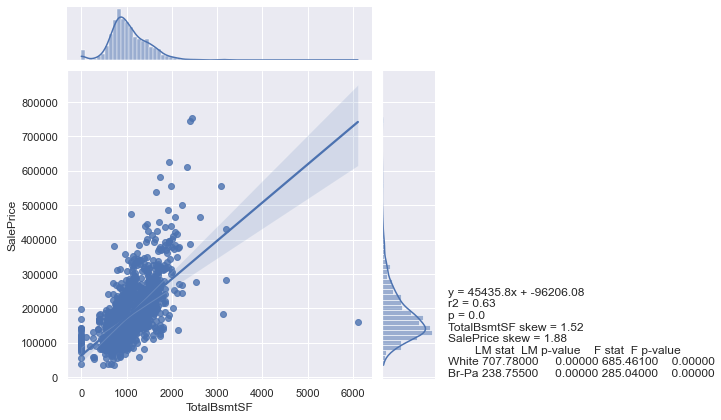

'GasA' n =1428; 'Floor' n = 1; no t-test performed
'GasW' n =18; 'Floor' n = 1; no t-test performed
'Grav' n =7; 'Floor' n = 1; no t-test performed
'Wall' n =4; 'Floor' n = 1; no t-test performed
'OthW' n =2; 'Floor' n = 1; no t-test performed


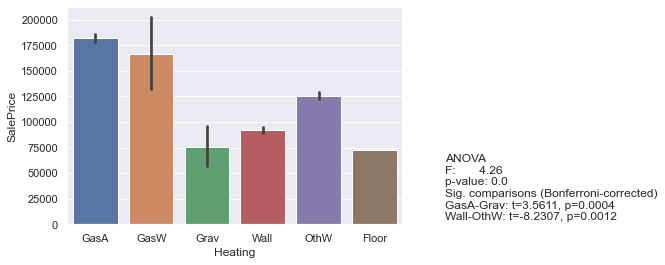

'Ex' n =741; 'Po' n = 1; no t-test performed
'Gd' n =241; 'Po' n = 1; no t-test performed
'TA' n =428; 'Po' n = 1; no t-test performed
'Fa' n =49; 'Po' n = 1; no t-test performed


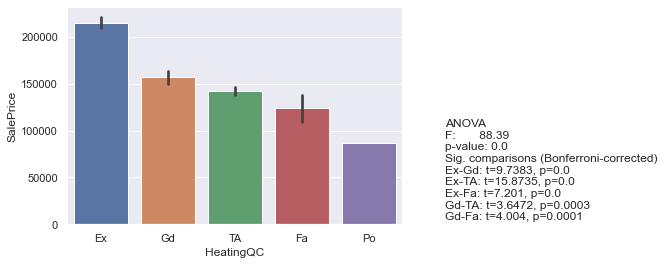

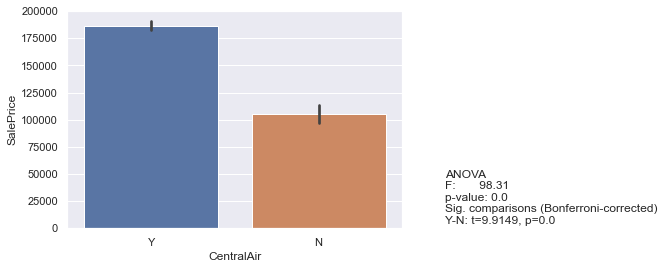

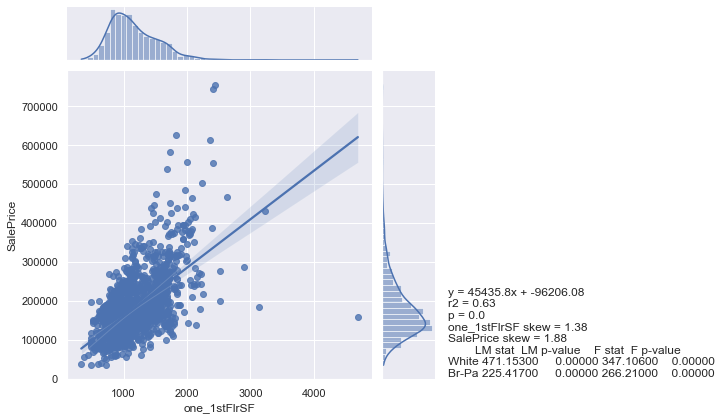

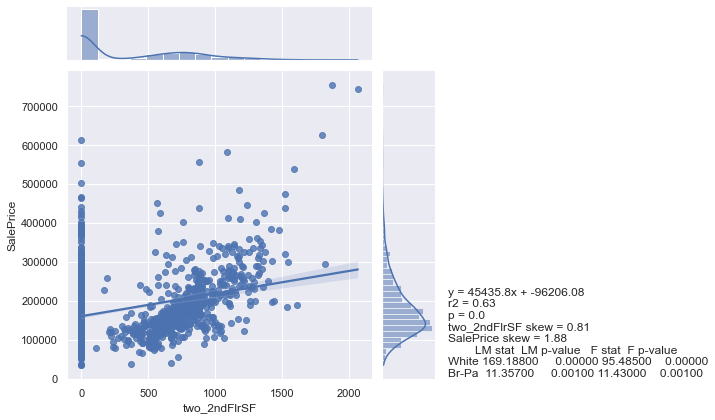

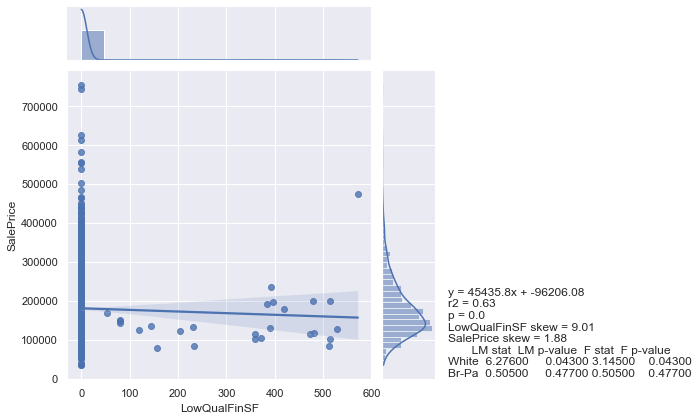

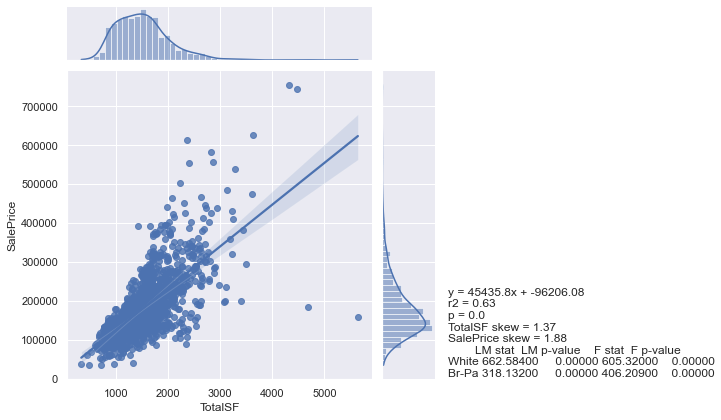

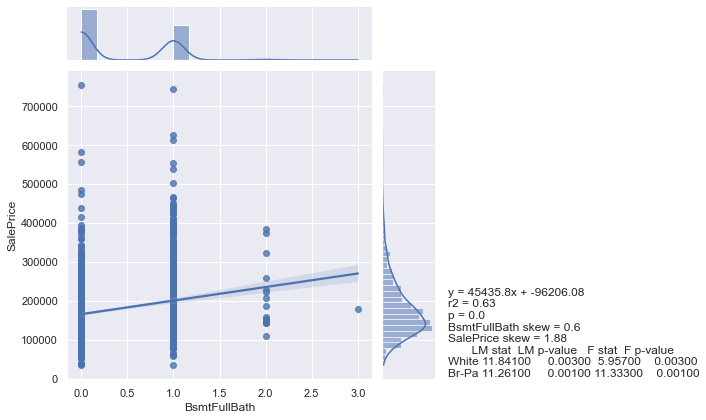

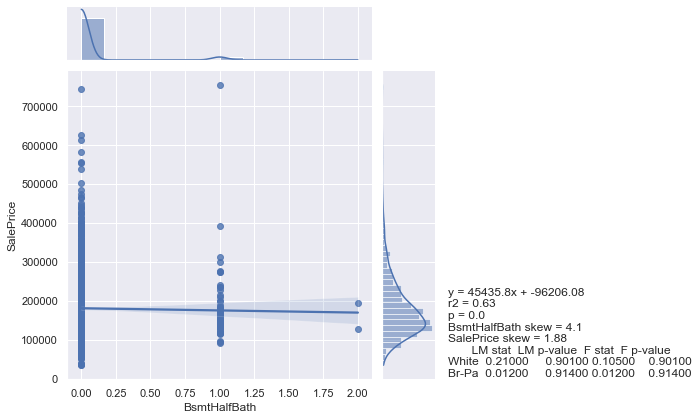

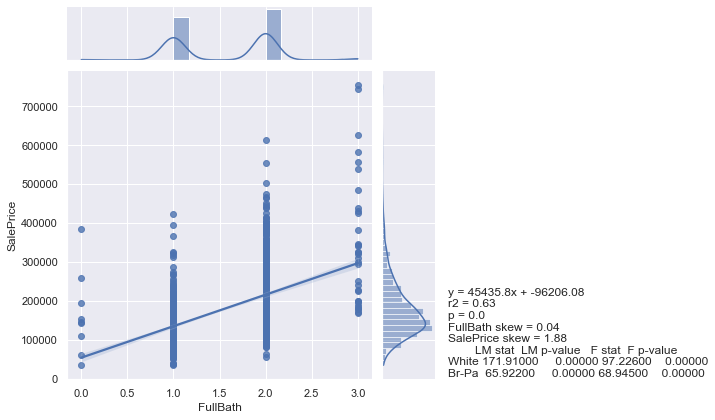

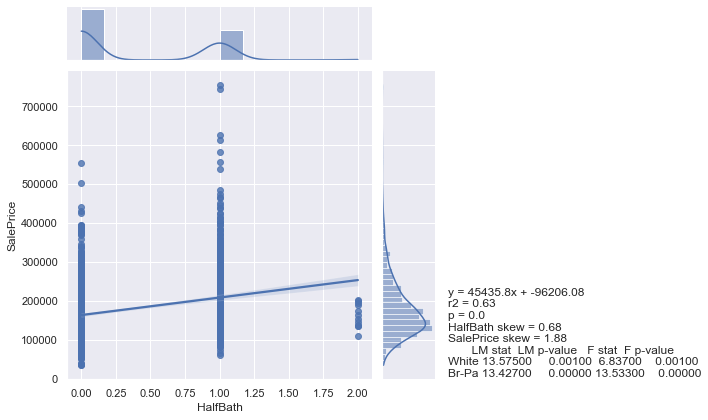

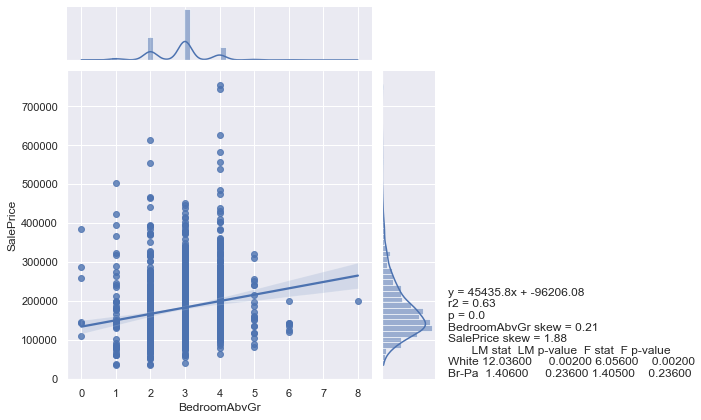

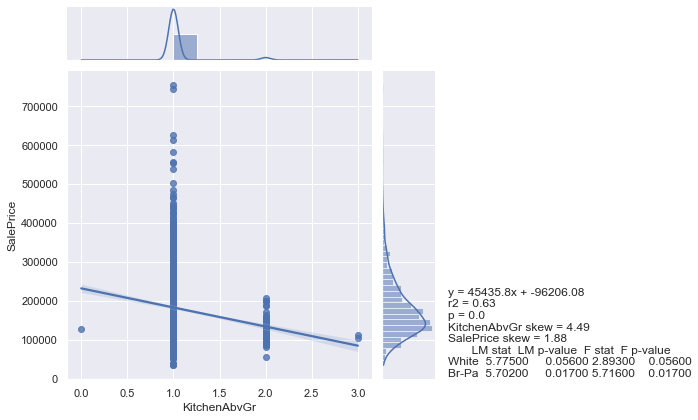

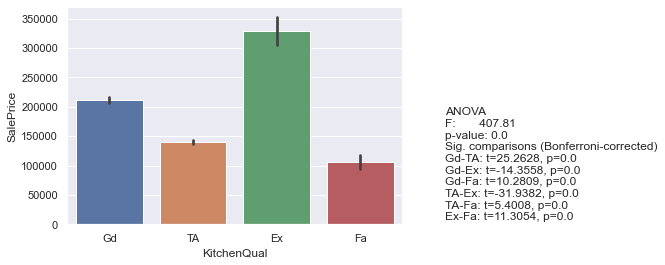

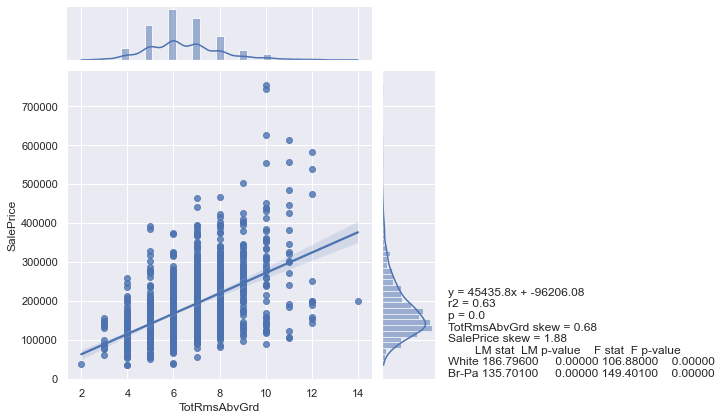

'Typ' n =1360; 'Sev' n = 1; no t-test performed
'Min1' n =31; 'Sev' n = 1; no t-test performed
'Maj1' n =14; 'Sev' n = 1; no t-test performed
'Min2' n =34; 'Sev' n = 1; no t-test performed
'Mod' n =15; 'Sev' n = 1; no t-test performed
'Maj2' n =5; 'Sev' n = 1; no t-test performed


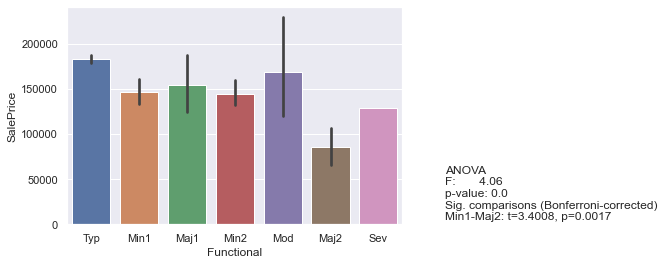

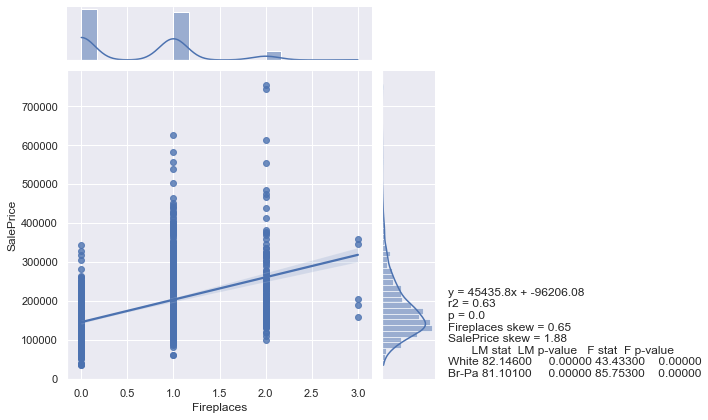

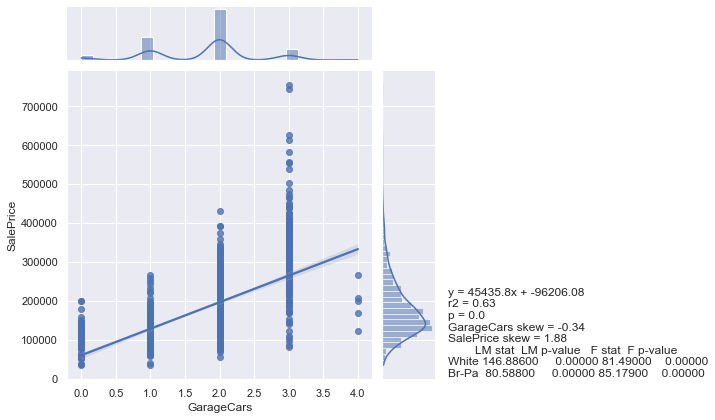

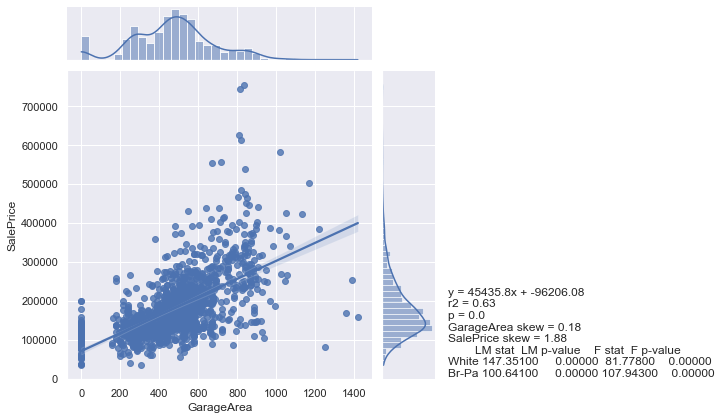

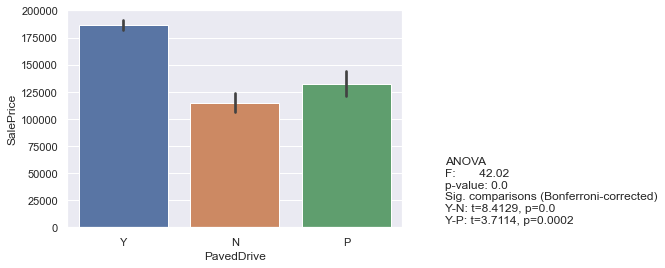

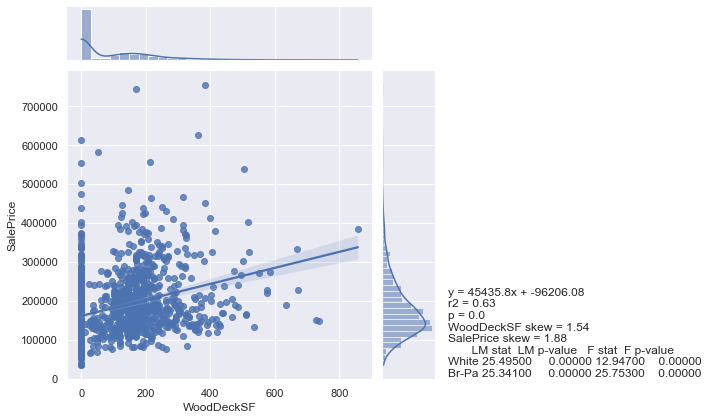

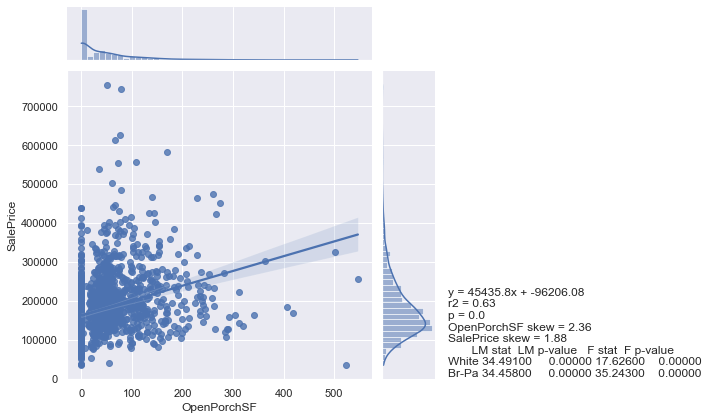

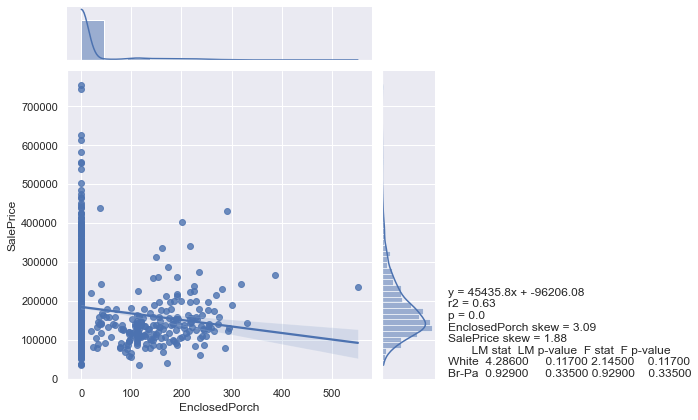

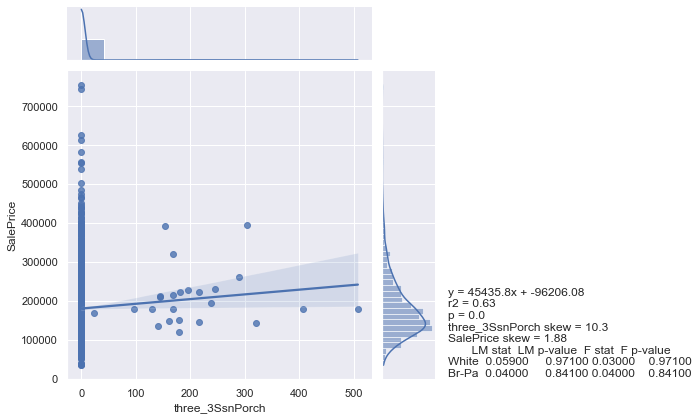

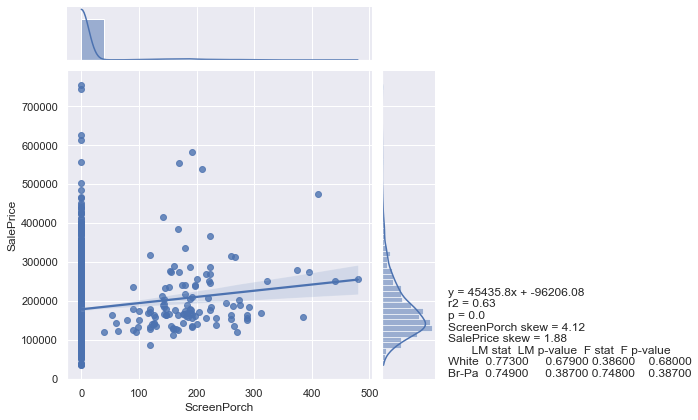

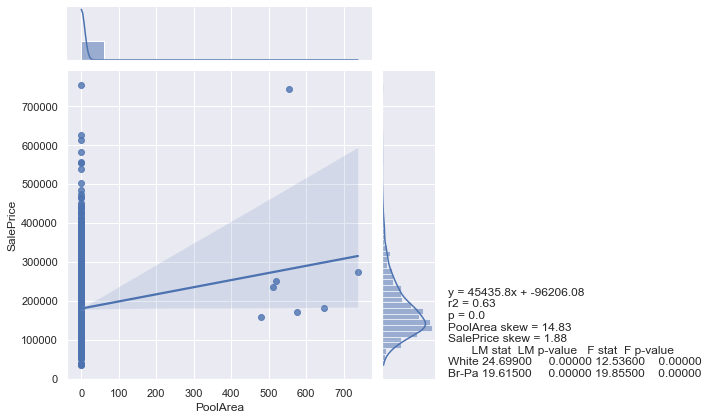

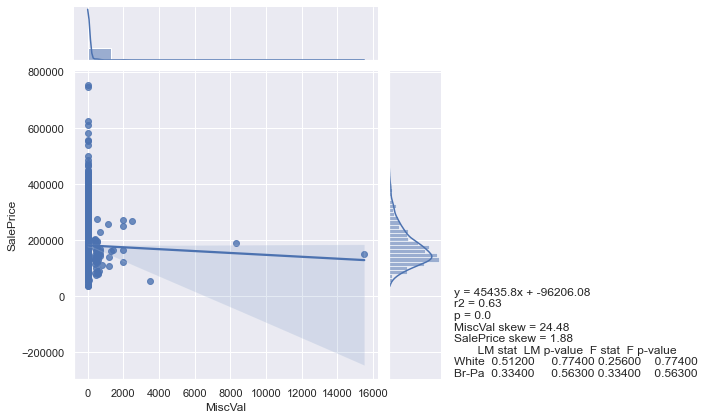

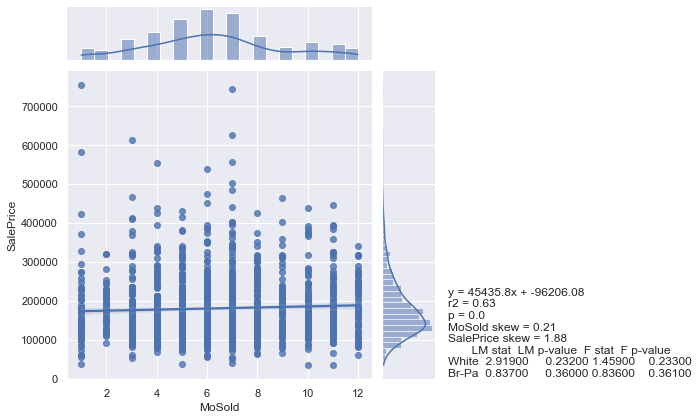

Unable to run white test of heteroscedasticity


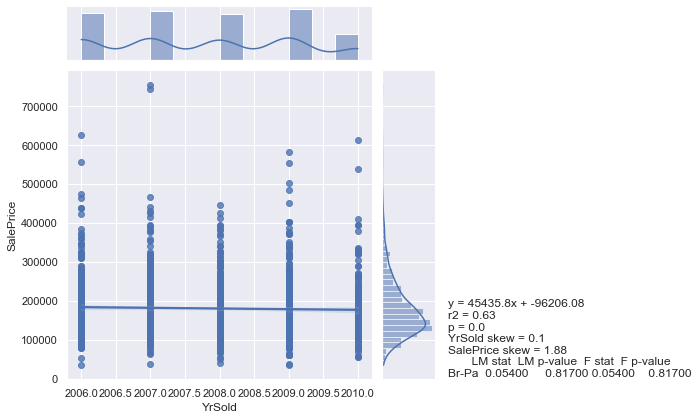

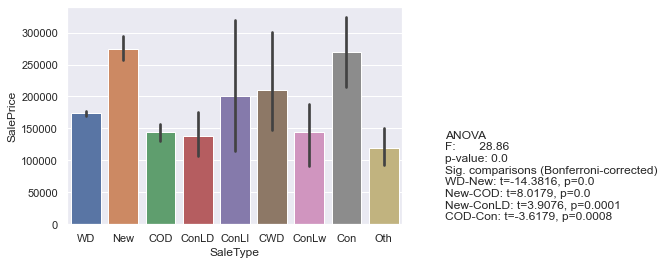

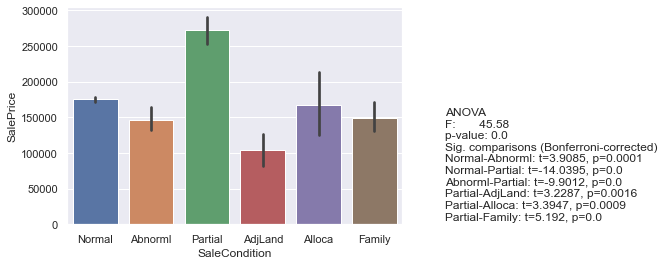

stat            object
+/-             object
Effect size    float64
p-value        float64
dtype: object


,stat,+/-,Effect size,p-value
OverallQual,r,1.00000,0.79100,0.00000
TotalSF,r,1.00000,0.70900,0.00000
GarageCars,r,1.00000,0.64000,0.00000
GarageArea,r,1.00000,0.62300,0.00000
TotalBsmtSF,r,1.00000,0.61400,0.00000
one_1stFlrSF,r,1.00000,0.60600,0.00000
FullBath,r,1.00000,0.56100,0.00000
TotRmsAbvGrd,r,1.00000,0.53400,0.00000
YearBuilt,r,1.00000,0.52300,0.00000
YearRemodAdd,r,1.00000,0.50700,0.00000


In [20]:
def bar_chart(df,feature,label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    import seaborn as sns
    
    #enter multiple lists of label values for each categorical group
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
    
    #Now calculate the anova results
    oneway = stats.f_oneway(*group_labels)
    
    #Next, calculate t-tests with bonferroni correction for p-value threshold
    unique_groups = df[feature].unique()
    ttests = []
    
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                
                #There must be more than 1 case per group to perform a t-test
                if len(type_1[label]) < 2 or len(type_2[label]) < 2:
                    print("'" + group + "' n =" + str(len(type_1)) + "; '" + group_2 + "' n = " + str(len(type_2)) + "; no t-test performed")
                else:
                    t,p = stats.ttest_ind(type_1[label],type_2[label])
                    ttests.append([group,group_2, t.round(4), p.round(4)])
    if len(ttests) > 0:
        p_threshold = 0.05/len(ttests) #Bonferroni corrected p-value determined
    else:
        p_threshold = 0.05
    
    #add all descriptive statistics to given diagram
    textstr = 'ANOVA' + '\n'
    textstr += 'F:       ' + str(oneway[0].round(2)) + '\n'
    textstr += 'p-value: ' + str(oneway[1].round(2)) + '\n'
    textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'
    
    for ttest in ttests:
        #print(ttest)
        if ttest[3] <= p_threshold:
            textstr += ttest[0] + '-' + ttest[1] + ": t=" + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
    
    ax = sns.barplot(x=df[feature],y=df[label])
    ax.text(1,0.1,textstr,fontsize=12,transform=plt.gcf().transFigure)
    plt.show()

def bivstats(df,label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    output_df = pd.DataFrame(columns=['stat','+/-','Effect size','p-value']) # r and p-value for correlation, F for Anova, X2 for Chi square
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0: #to remove ValueError: array must not contain infs or NaNs
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label],df[col])
                    output_df.loc[col] = ['r',np.sign(r),abs(round(r,3)),round(p,5)]
                    scatter(df[col],df[label])
                else:
                    F,p = anova(df[[col,label]],col,label)
                    output_df.loc[col] = ['F','',round(F,3),round(p,5)]
                    bar_chart(df,col,label)
            else:
                output_df.loc[col] = [np.nan,np.nan,np.nan,np.nan]
            
    #output_df.sort_values(by=['r'],ascending=False,inplace=True) #TypeError: '<' not supported between instances of 'str' and 'float' # round(r,3) is int,'-' is string. So convert '-' to np.nan
    print(output_df.dtypes)
    
    #return output_df
    return output_df.sort_values(by=['stat','Effect size'],ascending=[False,False])

import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
data = import_data("housing_full.csv")
bivstats(data,'SalePrice')

In [17]:
data['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [18]:
data['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)